# PROJET DE VISUALISATION DES DONNEES DE FORD GOBIKE

## Présenté par Amen K. ANONWODJI

<img src="FordGobike.jpg">

# Table des matières
<ul>
<li><a href="#introduction">Introduction</a></li>
<li><a href="#analyse">Analyse Exploratoire des données</a></li>
<li><a href="#nettoyage">Nettoyage de données</a></li>
<li><a href="#visualisation">Visualisation des données</a></li>    
<li><a href="#conclusion">Conclusion</a></li>
<li><a href="#limites">Limites</a></li>    
</ul>

<a id='introduction'></a>
# Introduction

L'objectif de ce présent projet est d'analyser et de visualiser les données de FordGobike. Cet ensemble de données comprend des informations sur les trajets individuels effectués dans un système de partage de vélos couvrant la grande région de la baie de San Francisco. Le jeu de données contient seize (16) variables et 183412 observations. 

<a id='analyse'></a>
# Analyse Exploratoire des données

Dans cette partie, nous allons importer les librairies nécessaires pour l'analyse, explorer les données, détecter les problèmes de qualités et de structures, néttoyer proprement nos données avant de les visauliser. 

In [102]:
# Importation des librairies
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_style("darkgrid")

%matplotlib inline
# Importation du package plotly pour la visualisation interactive des données
import plotly.express as px

### Chargement de la dataset

In [103]:
# Importation de la base
df = pd.read_csv('fordgobike.csv')

### Evaluation des données de la dataset

In [104]:
# Afficher les cinq (05) premières observations de la base
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [105]:
# Afficher les cinq (05) dernières observations de la base
df.tail(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [106]:
# Afficher aléatoirement cinq (05) observations de la dataset
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
108306,1150,2019-02-13 08:38:48.4420,2019-02-13 08:57:58.5600,39.0,Scott St at Golden Gate Ave,37.778999,-122.436861,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,5257,Customer,1983.0,Male,No
178958,835,2019-02-01 15:48:45.3590,2019-02-01 16:02:41.0480,55.0,Webster St at Grove St,37.777053,-122.429558,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,5163,Subscriber,1997.0,Male,No
179150,1408,2019-02-01 14:54:37.1210,2019-02-01 15:18:05.5430,33.0,Golden Gate Ave at Hyde St,37.781650,-122.415408,13.0,Commercial St at Montgomery St,37.794231,-122.402923,5329,Subscriber,1978.0,Male,Yes
182052,650,2019-02-01 08:35:31.9750,2019-02-01 08:46:22.4060,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,5523,Subscriber,1987.0,Male,No
38185,1157,2019-02-23 12:19:41.3810,2019-02-23 12:38:58.8680,267.0,Derby St at College Ave,37.861804,-122.253569,258.0,University Ave at Oxford St,37.872355,-122.266447,4667,Customer,1997.0,Female,No


In [107]:
# Structure de la dataset
df.shape

(183412, 16)

In [108]:
# Nom des différentes variables de la dataset
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [109]:
# Informations sur le type de données des variables de la dataset
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [110]:
# Vérifier les valeurs manquantes par colonnes
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [111]:
# Statistique descriptive des variables numériques de la dataset
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [112]:
# Afficher les valeurs dupliquées
df.duplicated().sum()

0

Après évaluation (programmatique) des données, nous recensons les problèmes de qualités suivantes :
- Présence de valeurs manquantes pour les variables **start_station_id**, **start_station_name**, **end_station_id**, **end_station_name**, **member_birth_year** et **member_gender**.
- Les variables suivantes : **start_time** et **end_time** ne sont pas sous format date.
- Les variables **user_type**, **member_gender** et **bike_share_for_all_trip** sont des variables catégorielles et non des objects et floats. 
- Créer une colonne **age** des utilisateurs à partir de la colonne **member_birth_year.**
- Créer les différentes variables suivantes **start_time_month**, **start_time_month_num**, **start_time_weekday**, **start_time_hour** et **end_time_hour** à partir des colonnes **start_time** et **end_time.**
- Créer la colonne **duration_min** à partir de la colonne **duration_sec**.
- Supprimer quelques colonnes inutiles qui ne seront pas nécessairement être prises en compte dans les analyses et pour la visualisation. 

<a id='nettoyage'></a>
# Nettoyage de données

### Copie des données

In [113]:
# Copie de la dataset
data = df.copy()

### Résolution des problèmes de structures et de qualités

- **Présence de valeurs manquantes pour les variables start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year et member_gender.**

#### Définir

- Supprimer les valeurs manquantes des colonnes **start_station_id**, **start_station_name**, **end_station_id**, **end_station_name**, **member_birth_year** et **member_gender.**

#### Coder

In [114]:
# Supprimer les valeurs manquantes de la dataset
data.dropna(inplace = True)

#### Tester

In [115]:
# Vérifier les valeurs manquantes de la dataset
data.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

- **Les variables suivantes : start_time et end_time ne sont pas sous format date.**

#### Définir

Convertir les colonnes **start_time** et **end_time** sous format date.

#### Coder

In [116]:
# Convertir start_time et end_time sous format date
data['start_time'] = pd.to_datetime(data['start_time'])
data['end_time'] = pd.to_datetime(data['end_time'])

#### Tester

In [117]:
# Afficher les types des colonnes de la dataset
data.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

- **Les variables user_type, member_gender et bike_share_for_all_trip sont des variables catégorielles et non des objects et floats.**

#### Définir

Mettre les colonnes suivantes **user_type**, **member_gender** et **bike_share_for_all_trip** sous forme de variables catégorielles.

#### Coder

In [118]:
# Mettre sous forme de variables catégorielles 
data.user_type = data.user_type.astype('category')
data.member_gender = data.member_gender.astype('category')
data.bike_share_for_all_trip = data.bike_share_for_all_trip.astype('category')

#### Tester

In [119]:
# Types des variables de la base
data.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
dtype: object

- **Créer une colonne age des utilisateurs à partir de la colonne member_birth_year.**

#### Définir

Créer la colonne **age**.

#### Coder

In [120]:
# Créer une colonne age des utilisateurs 
data['age'] = 2022 - data['member_birth_year']

#### Tester

In [121]:
# Vérifier que la variable age a été effectivement créée
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,38.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,50.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,33.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,48.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,63.0


- **Mettre la nouvelle colonne age créée sous format integer au lieu de float.**

#### Définir

Convertir la variable **age** en entier.

#### Coder

In [122]:
# Convertir la colonne age en entier
data.age = data.age.astype('int64')

#### Tester

In [123]:
# Vérifier le type des données de la base
data.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
age                                 int64
dtype: object

- **Créer les différentes variables suivantes start_time_month, start_time_month_num, start_time_weekday, start_time_hour et end_time_hour à partir des colonnes start_time et end_time.**

#### Définir

Création de nouvelles colonnes à partir des colonnes **start_time** et **end_time.**

#### Coder

In [124]:
# Création des colonnes suivantes
data['start_time_month'] = data['start_time'].dt.strftime('%B')
data['start_time_weekday'] = data['start_time'].dt.strftime('%A')
data['start_time_hour'] = data['start_time'].dt.hour
data['end_time_hour'] = data['end_time'].dt.hour

#### Tester

In [125]:
# Afficher les colonnes de la dataset
data.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'age',
       'start_time_month', 'start_time_weekday', 'start_time_hour',
       'end_time_hour'],
      dtype='object')

- **Créer la colonne duration_min à partir de la colonne duration_sec.**

#### Définir

- Créer la colonne **duration_min**.

#### Coder

In [126]:
# Création de nouvelles variables
data["duration_min"] = round(data.duration_sec/60,2)
data.duration_min = data.duration_min.astype('int64')

#### Tester

In [127]:
# Afficher les colonnes de la dataset
data.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'age',
       'start_time_month', 'start_time_weekday', 'start_time_hour',
       'end_time_hour', 'duration_min'],
      dtype='object')

In [128]:
# Type des colonnes de la dataset
data.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
age                                 int64
start_time_month                   object
start_time_weekday                 object
start_time_hour                     int64
end_time_hour                       int64
duration_min                        int64
dtype: object

**Supprimer quelques colonnes inutiles qui ne seront pas nécessairement être prises en compte dans les analyses et pour la visualisation.**

#### Définir

Supprimer toutes ces colonnes inutiles.

#### Coder

In [129]:
# Supprimer les colonnes indésirables
data.drop(columns=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'member_birth_year', 'end_station_id', 'start_station_id', 'bike_id', 'start_time', 'end_time', 'duration_sec'], axis = 1, inplace = True)

#### Tester

In [130]:
# Nom des colonnes restantes
data.columns

Index(['start_station_name', 'end_station_name', 'user_type', 'member_gender',
       'bike_share_for_all_trip', 'age', 'start_time_month',
       'start_time_weekday', 'start_time_hour', 'end_time_hour',
       'duration_min'],
      dtype='object')

In [131]:
# Afficher par défaut les (05) premières observations des colonnes restantes
data.head()

,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,age,start_time_month,start_time_weekday,start_time_hour,end_time_hour,duration_min
0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,No,38,February,Thursday,17,8,869
2,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,Male,No,50,February,Thursday,12,5,1030
3,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,Other,No,33,February,Thursday,17,4,608
4,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,Male,Yes,48,February,Thursday,23,0,26
5,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,Male,No,63,February,Thursday,23,0,29


In [132]:
# Structure de la dataset
data.shape

(174952, 11)

### Quelle est la structure du jeu de données ?
- Notre jeu de données contient après préparation et nettoyage des données 174952 observations et 11 variables.

### Quelles sont les principales caractéristiques d'intérêt du jeu de données ?

Les principales caractéristiques comprennent des données relatives au début et à la fin d'un trajet en vélo. Cela peut être utilisé pour calculer quand les vélos sont en forte ou faible demande. Il existe également de nombreuses données relatives aux utilisateurs du service de vélo, notamment leur âge, leur sexe et s'ils sont des abonnés ou des utilisateurs occasionnels.

<a id='visualisation'></a>
# Visualisation des données

## Exploration Univariée

Dans cette section, nous allons étudier les distributions des variables individuelles d'intérêt.

### Quelle est la distribution pour le type d'utilisateur ?

E:\ANACONDA\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


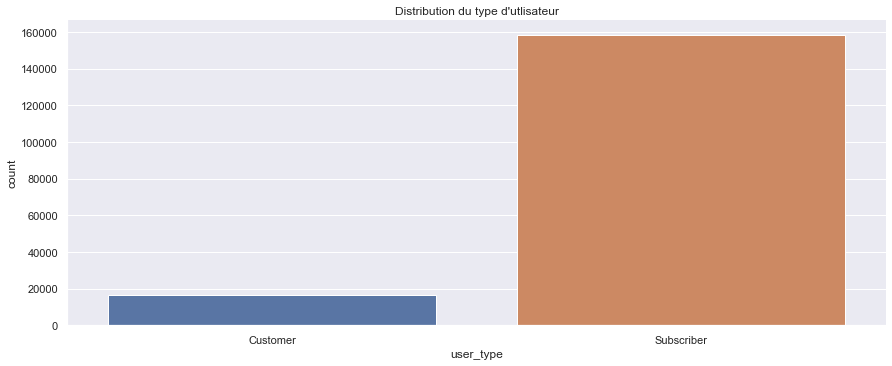

In [133]:
# Diagramme en barre de la variable user_type
sns.factorplot(x = 'user_type', data=data , kind = 'count',aspect = 2.5);
plt.title("Distribution du type d'utlisateur");

- Le graphique ci-dessus révèle que la majorité des utilisateurs sont des abonnés.

### Quelle est la distribution du genre ?

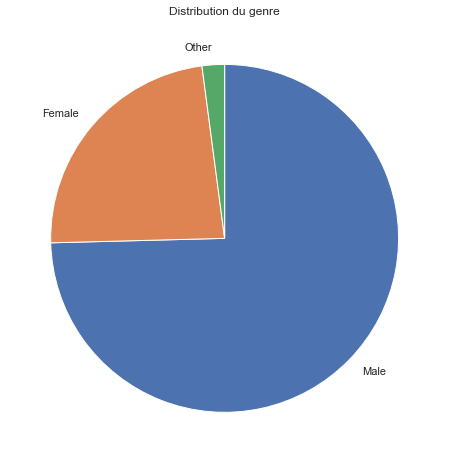

In [134]:
# Obtenir le décompte des valeurs du genre
gender_count = data.member_gender.value_counts()

# Diagramme circulaire de la distribution du genre
plt.pie(gender_count, labels = gender_count.index, startangle = 90, counterclock = False);
plt.title("Distribution du genre")
fig=plt.gcf()
fig.set_size_inches(8, 8)
plt.show();

- Le graphique ci-dessus montre que la majorité des utilisateurs sont des hommes. Ensuite viennent les femmes. Les personnes d'autres sexe n'empruntent pas vraiment les services vélo.

### Quelle est la distribution de l'âge des utilisateurs ?

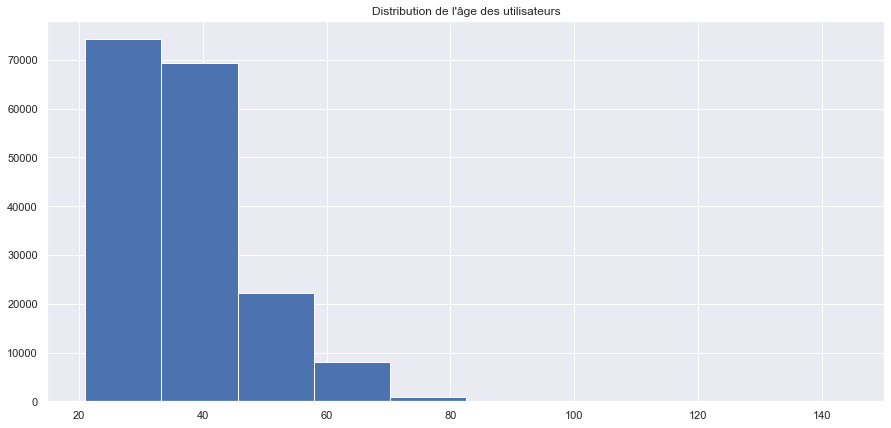

In [135]:
# Histogramme de l'âge
plt.figure(figsize=(15, 7))
plt.hist(data = data, x = 'age');
plt.title("Distribution de l'âge des utilisateurs")
plt.show();

- Le graphique ci-dessus montre que la majorité des utilisateurs ont un âge compris entre 22 et 39 ans.

### Quelle est la répartition des utilisateurs de vélos en libre service sur l'ensemble des Trajets ?

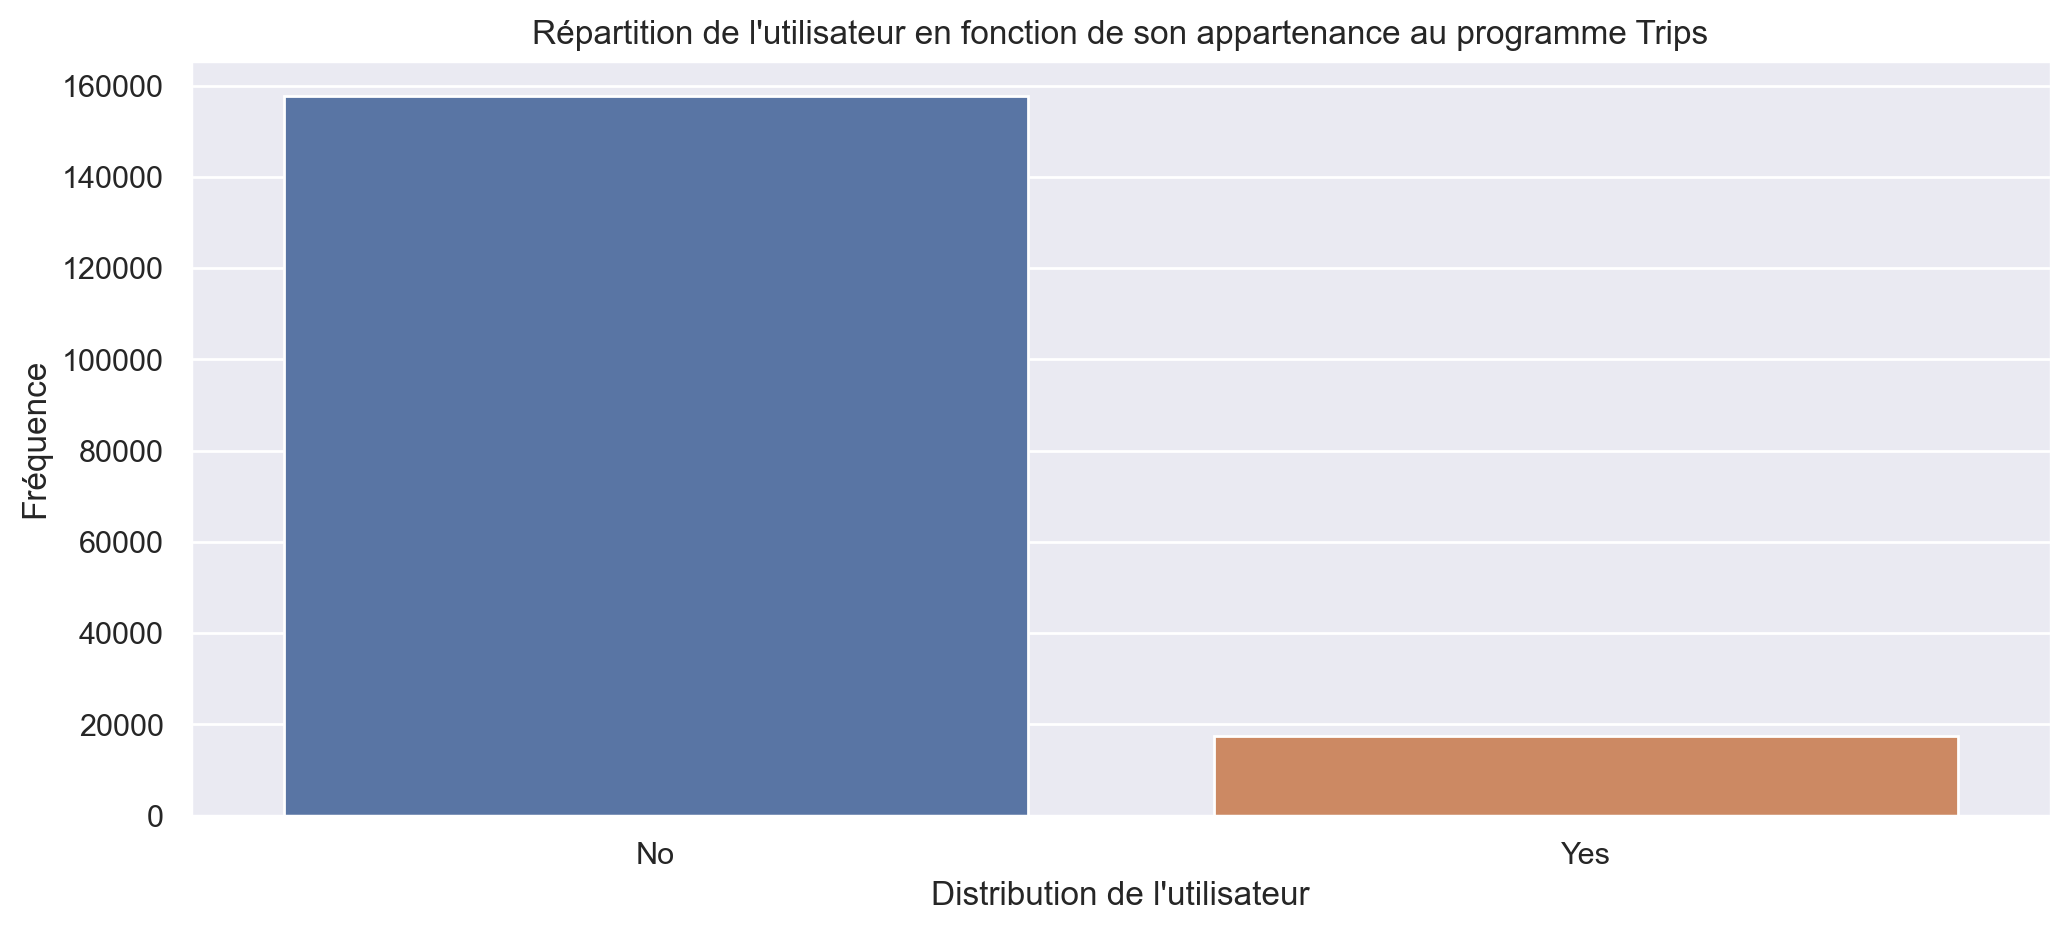

In [136]:
# Diagramme en bâton de la colonne bike_share_for_all_trip
plt.figure(figsize = (12, 5), dpi = 200)

plot = sns.countplot(data = data, x = 'bike_share_for_all_trip')
plt.xlabel("Distribution de l'utilisateur")
plt.ylabel('Fréquence')
plt.title("Répartition de l'utilisateur en fonction de son appartenance au programme Trips")
plt.show();

- Le graphique ci-dessus montre que la majorité des utilisateurs ne font pas partie du programme Trips.

### La colonne âge comporte t-il de valeures aberrantes ?

L'histogramme de la distribution des âges des utilisateurs ne montrent pas clairement si la colonne **age** contient des valeurs aberrantes ou non. Nous allons donc construire la boîte à moustache pour détecter les valeurs aberrantes au cas où elles existent.

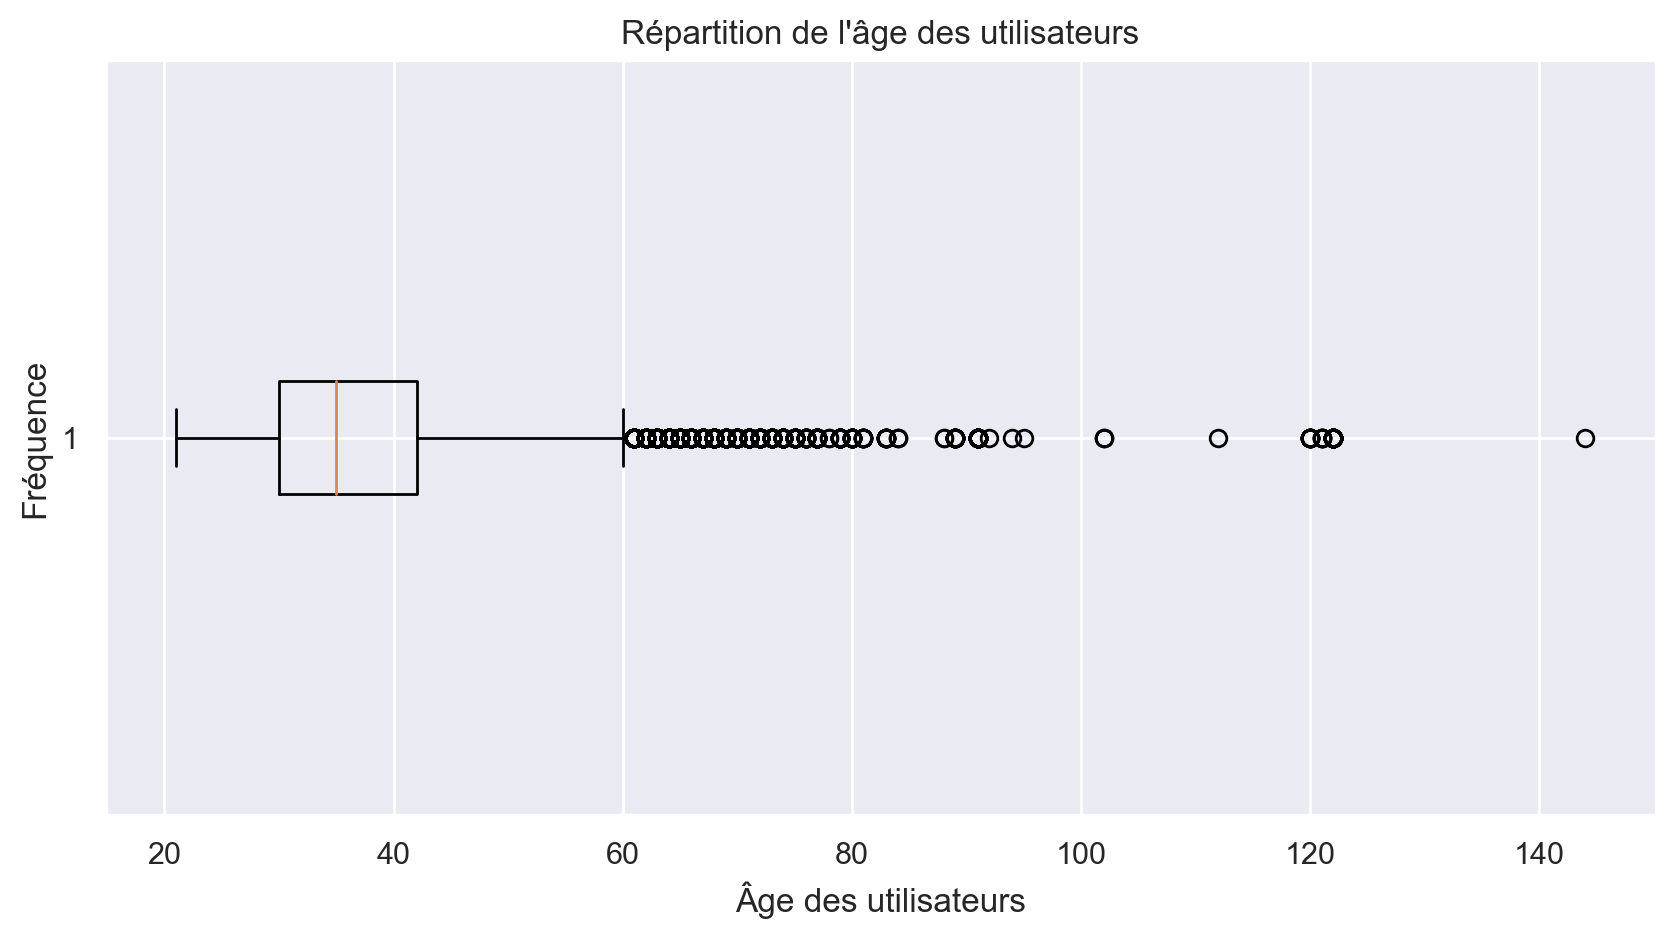

In [137]:
# Boîte à moustache de la colonne âge
plt.figure(figsize = (10, 5), dpi = 200)

plt.boxplot(data['age'], vert=False)
plt.xlabel("Âge des utilisateurs")
plt.ylabel('Fréquence')
plt.title("Répartition de l'âge des utilisateurs")

plt.show();

- La boîte à moustache montre quelques valeurs aberrantes pour la colonne âge de l'utilisateur. L'âge maximal de 140 ans observé est une valeur aberrante.

### Quelle est la station de vélo la plus fréquentée ?

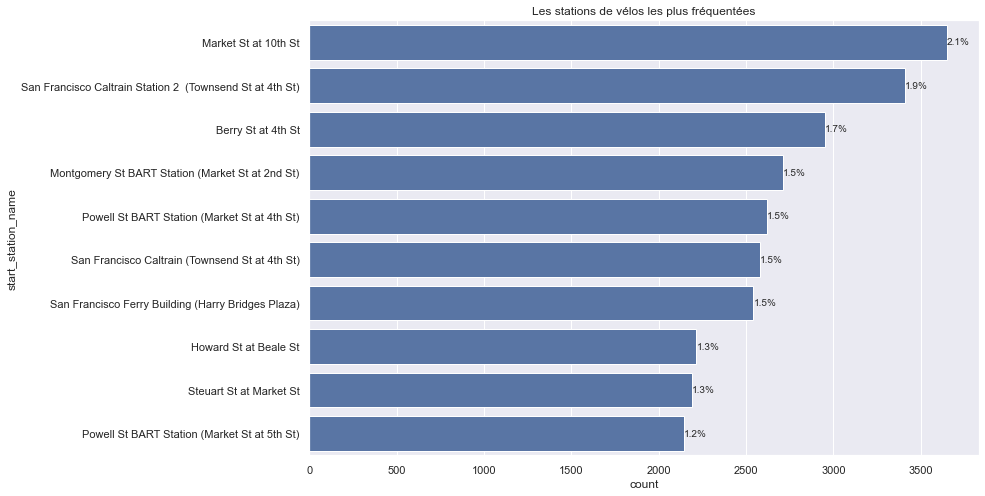

In [142]:
# Station de vélo les plus fréquentées
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
c = sns.color_palette()[0]
o = data.start_station_name.value_counts().head(10).index
sns.countplot(data=data , y='start_station_name' , color=c , order=o);

# Mettre les pourcentages
start_counts = data.start_station_name.value_counts().head(10)
for i in range(start_counts.shape[0]):
  count = start_counts[i]
  pct_string = '{:0.1f}%'.format(100*count/data.shape[0])
  plt.text(count+1, i, pct_string, va = 'center')
  plt.title("Les stations de vélos les plus fréquentées");

- Les deux premières stations Ford GoBike les plus fréquentées sont Market St et San Francisco Caltrain Station 2.

### Quelle est la distribution de la durée du trajet en minutes ?

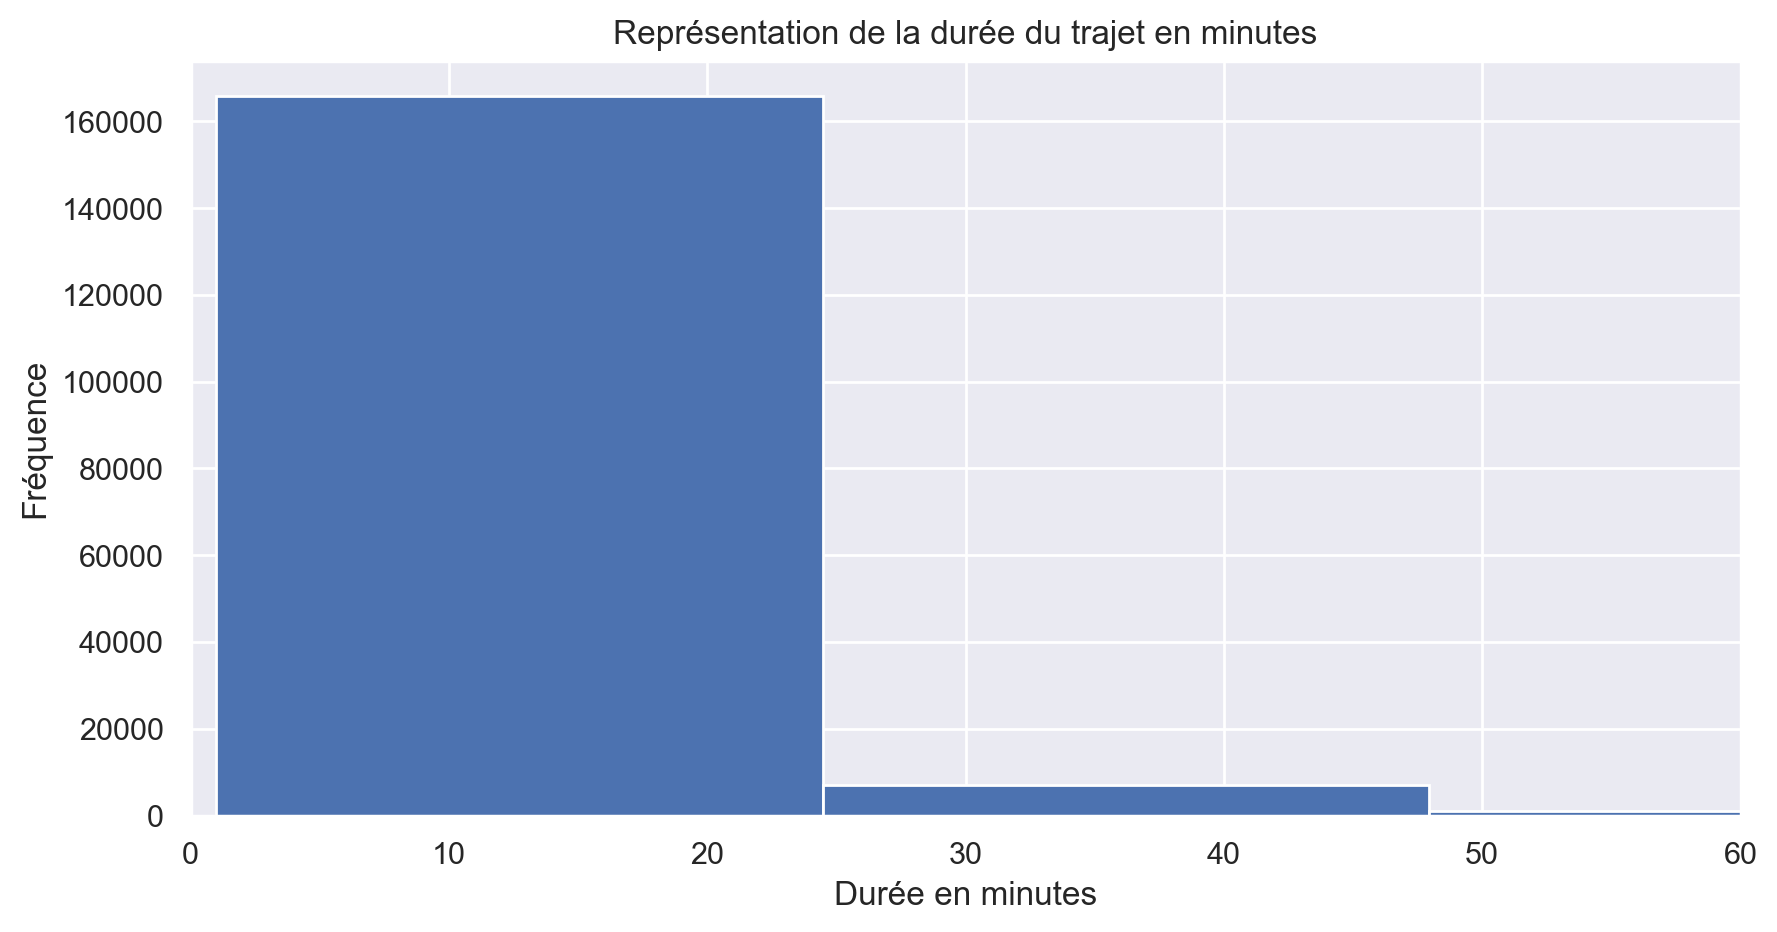

In [143]:
# Histogramme de la distribution de la durée du trajet en minutes
plt.figure(figsize = (10,5), dpi = 200)

data['duration_min'].hist(bins=60)
plt.xlim(0, 60)
plt.xlabel('Durée en minutes')
plt.ylabel('Fréquence')
plt.title("Représentation de la durée du trajet en minutes")

plt.show();

- L'histogramme de la distribution de la durée du trajet en minutes montre que la majorité des utilisateurs empruntent moins d'une démi heure les services de Ford GoBike pour leurs courses à vélo.

### Quelle est la distribution de l'utilisation en semaine ?

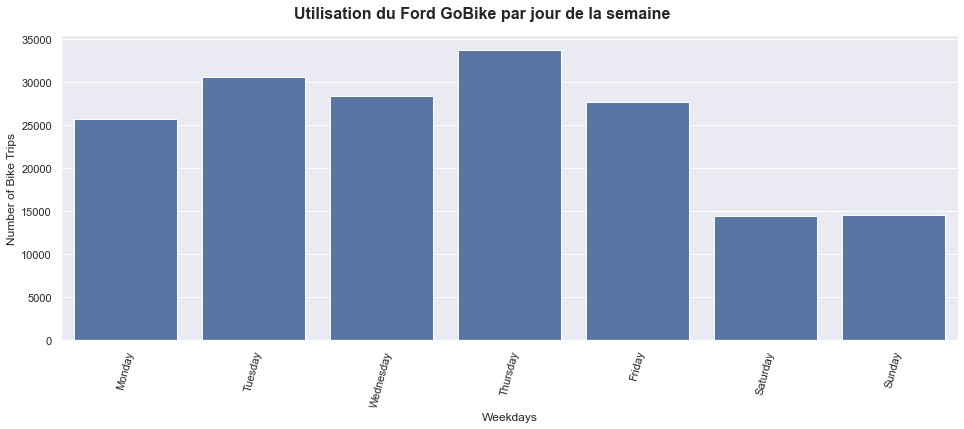

In [145]:
# Utilisation en semaine du système de vélo
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plot = sns.catplot(data=data, x='start_time_weekday', kind='count', color = sns.color_palette()[0], order = weekday, aspect = 2.7)
plot.set_axis_labels('Weekdays', 'Number of Bike Trips')
plot.fig.suptitle('Utilisation du Ford GoBike par jour de la semaine', y=1.05, fontsize=16, fontweight='bold');
plot.set_xticklabels(rotation=75);

- D'après le graphe, on note un changement dans la fréquence des jours ouvrables et les week-end. La mojorité donc des utilisateurs uilisent plus les vélos les jours ouvrables pour se rendre au travail que les week-end.

### Quelle est la distribution d'heure d'utilisation des vélos ?

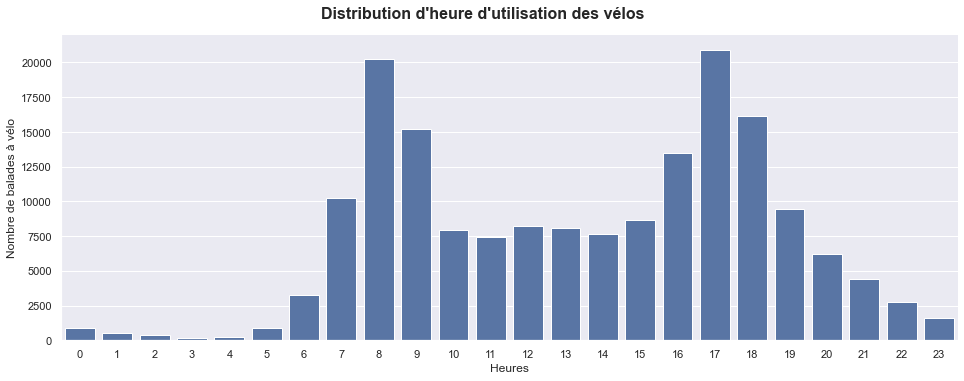

In [149]:
# Heures d'utilisation des services vélos
plot = sns.catplot(data = data, x='start_time_hour', kind='count', color = sns.color_palette()[0], aspect = 2.7)
plot.set_axis_labels('Heures', 'Nombre de balades à vélo')
plot.fig.suptitle("Distribution d'heure d'utilisation des vélos", y=1.05, fontsize=16, fontweight='bold');

- Les services vélo de la sociéte Ford GoBike sont beaucoup plus utilisé le matin de 8h à 9h et l'après-midi de 17h à 18h.

## Exploration Bivariée

Examinons maintenant les relations entre deux variables de notre jeu de données.

### Quelle est la durée moyenne de trajet pour les catégories de type d'usagers ?

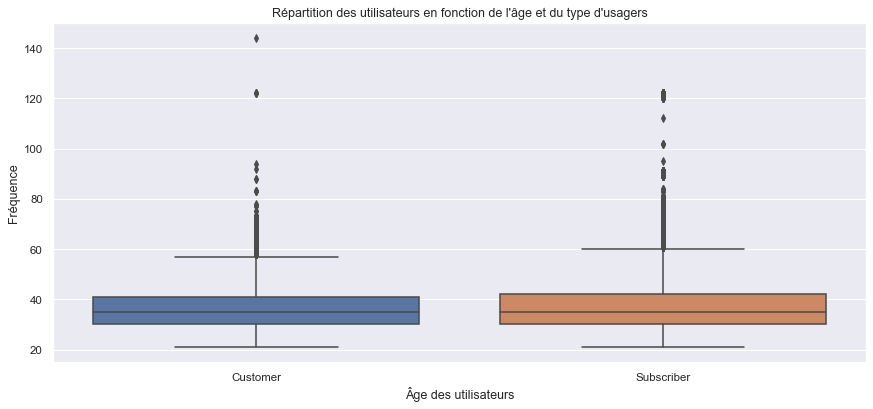

In [151]:
# Répartition de l'âge par type d'utilisateur

plt.figure(figsize = (14, 6), dpi = 75)
sns.boxplot(data = data, x = 'user_type', y = 'age')
plt.xlabel('Âge des utilisateurs')
plt.ylabel('Fréquence')
plt.title("Répartition des utilisateurs en fonction de l'âge et du type d'usagers")
plt.show();

- Les clients effectuent un voyage plus long en vélo que les abonnés.

### Quelle est la durée du trajet pour chaque genre en minutes ?

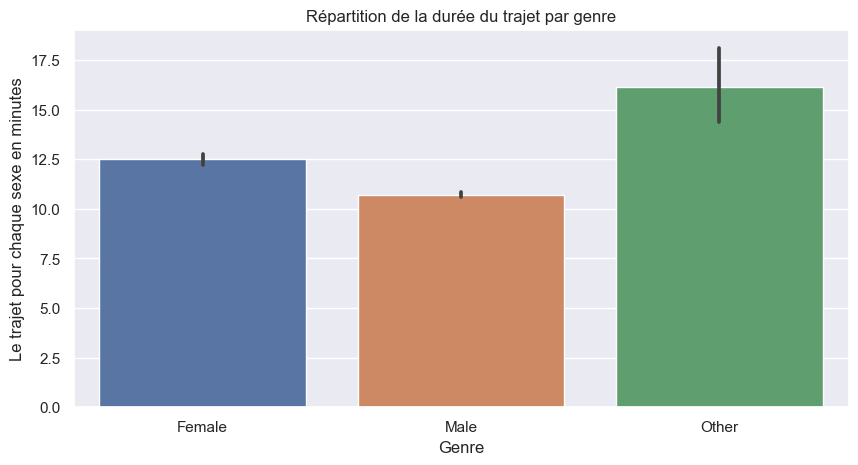

In [152]:
# Répartition de la durée par genre

plt.figure(figsize = (10, 5), dpi = 100)
sns.barplot(data = data, x = "member_gender", y = "duration_min")
plt.xlabel('Genre')
plt.ylabel('Le trajet pour chaque sexe en minutes')
plt.title("Répartition de la durée du trajet par genre")
plt.show();

- Les temps de trajet plus courts sont pour les utilisateurs masculins.

### Comment est la répartition des utilisateurs en fonction de l'âge et du genre ?

E:\ANACONDA\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


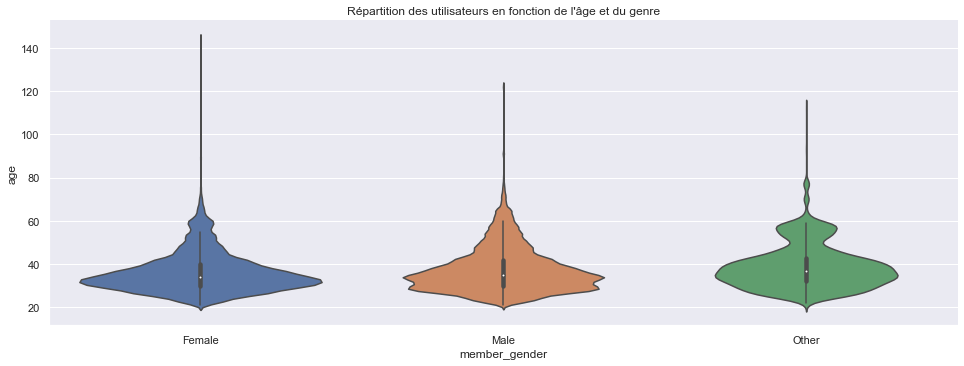

In [160]:
# Diagramme de violin
sns.factorplot(x = 'member_gender', y = 'age' , data = data , kind='violin', aspect=2.7);
plt.title("Répartition des utilisateurs en fonction de l'âge et du genre");

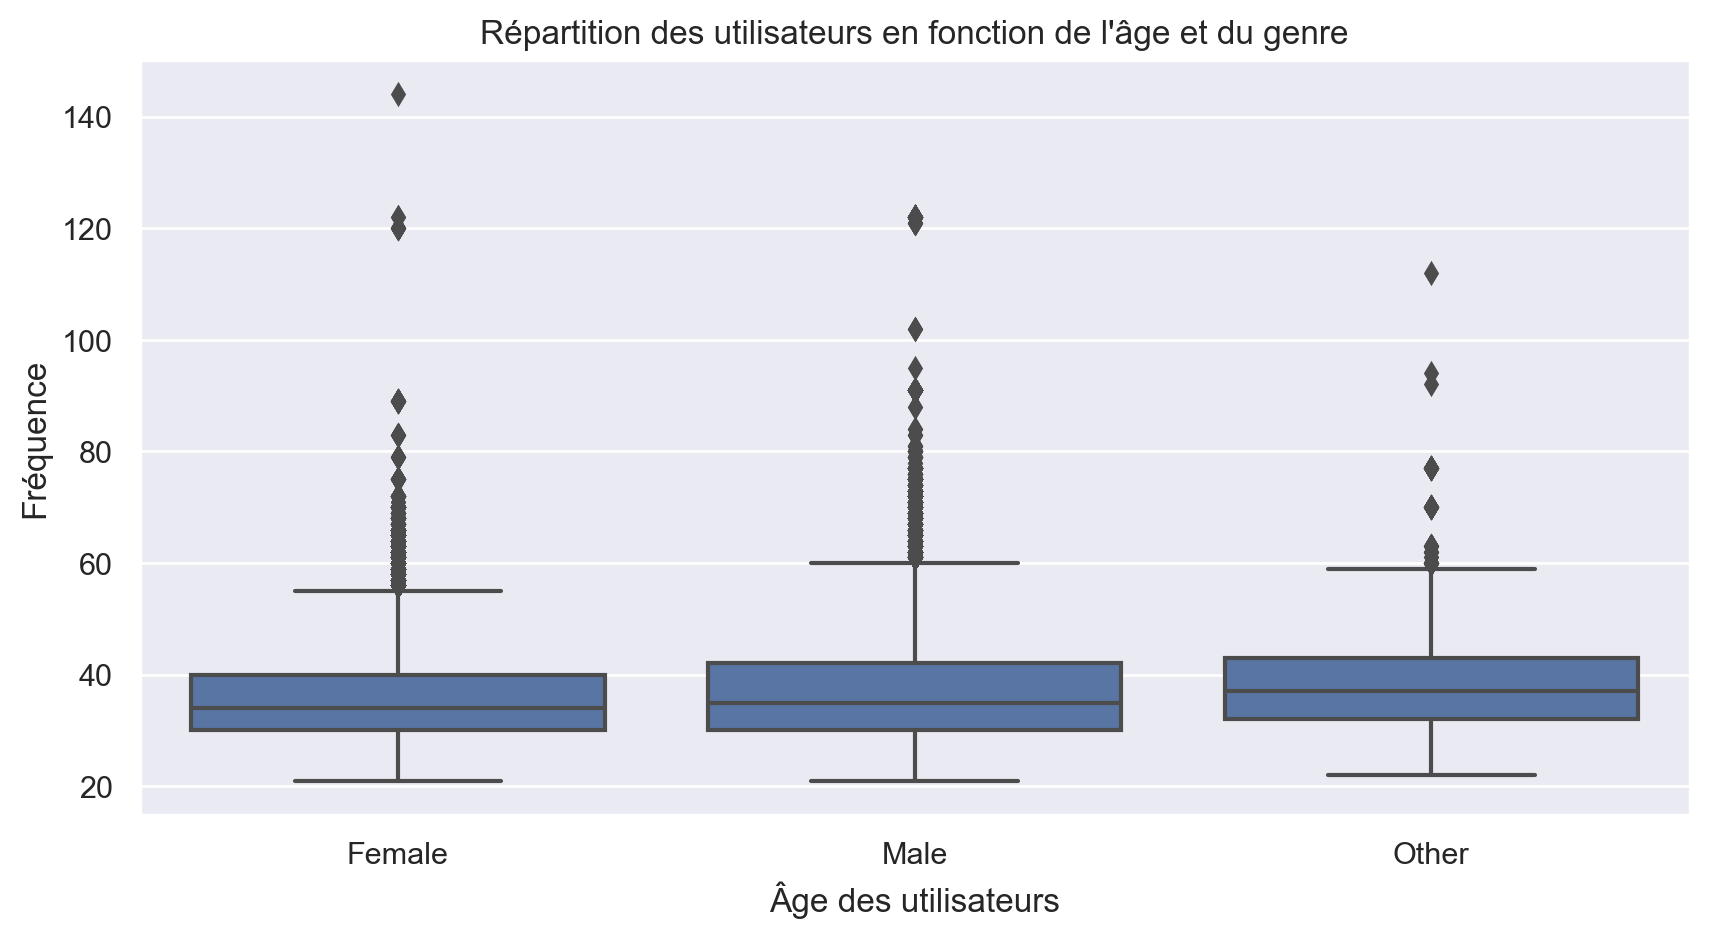

In [159]:
# Répartition des utilisateurs en fonction de l'âge et du genre
plt.figure(figsize = (10, 5), dpi = 200)
base_color = sns.color_palette()[0]
sns.boxplot(data=data,x = "member_gender", y = "age", color=base_color)
plt.xlabel('Âge des utilisateurs')
plt.ylabel('Fréquence')

plt.title("Répartition des utilisateurs en fonction de l'âge et du genre");

- Les femmes en âge utilisent beaucoup plus les services vélos que les hommes et les autres sexes.

### Quelle est la relation entre l'âge et la durée du trajet en minutes ?

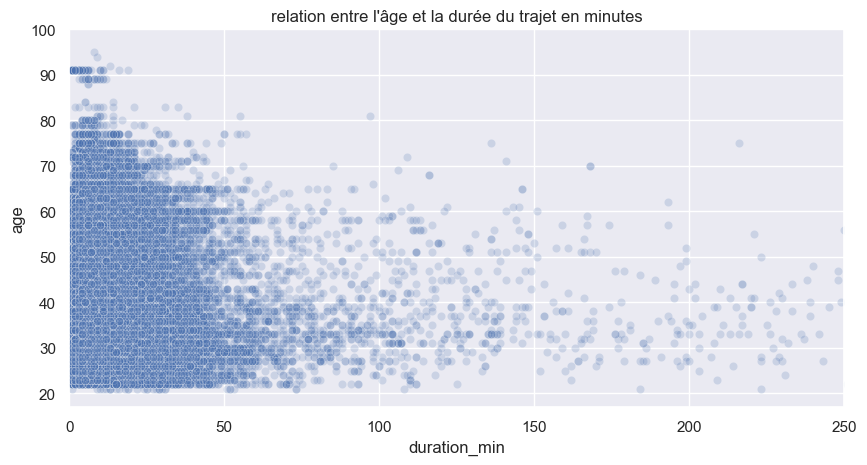

In [178]:
# Nuage de points montrant la relation entre l'âge et la durée du trajet
plt.figure(figsize = (10, 5), dpi = 100)
sns.scatterplot(data = data, x =  data.duration_min , y =  data.age , alpha = 0.2 )
plt.ylim((17,100))
plt.xlim((0,250))
plt.title("relation entre l'âge et la durée du trajet en minutes")
plt.show();

- On remarque que tous les âges préfèrent passer leurs trajets moins de 200 minutes.

### Quelle est la relation entre le jour de la semaine et le nombre de trajets selon le type d'utilisateur ?

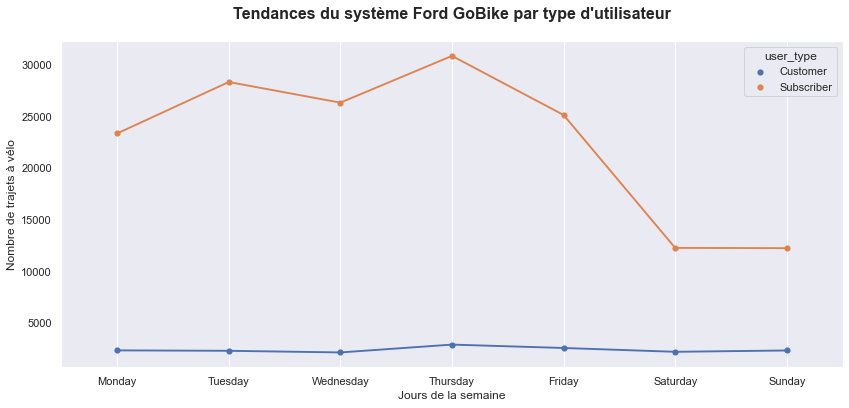

In [193]:
# Utilisation du client par jour de la semaine par rapport à l'utilisation de l'abonné par jour de la semaine
plt.figure(figsize=(14, 6))

df_user_week = data.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = sns.pointplot(data=df_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title("Tendances du système Ford GoBike par type d'utilisateur", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Jours de la semaine')
plt.ylabel('Nombre de trajets à vélo');
plt.grid()

- Les clients ont une utilisation relativement faible du système de vélos en libre-service avec une légère augmentation le week-end. C'est le contraire chez les abonnés.

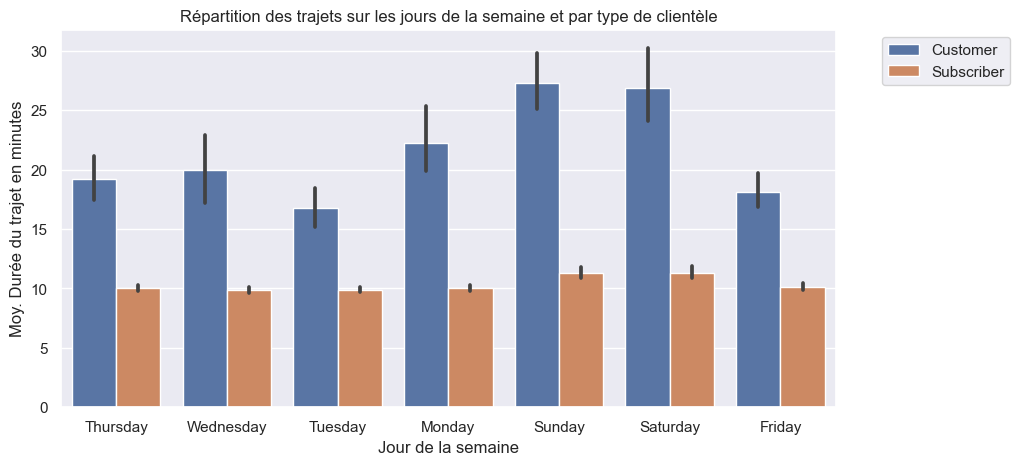

In [194]:
# Répartition des trajets sur les jours de la semaine et par type de clientèle
plt.figure(figsize = (10,5), dpi = 100)

sns.barplot(data = data, x = "start_time_weekday", y = "duration_min", hue='user_type')
plt.xlabel('Jour de la semaine');
plt.ylabel('Moy. Durée du trajet en minutes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Répartition des trajets sur les jours de la semaine et par type de clientèle")

plt.show()

- Les clients ont toujours des trajets plus longs que les abonnés.

## Exploration Multivariée

Dans cette partie, nous allons créer des graphiques de trois variables ou plus pour approfondir nos analyses.

### Quelle est la corrélation entre chaque variable de l'ensemble de données ?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


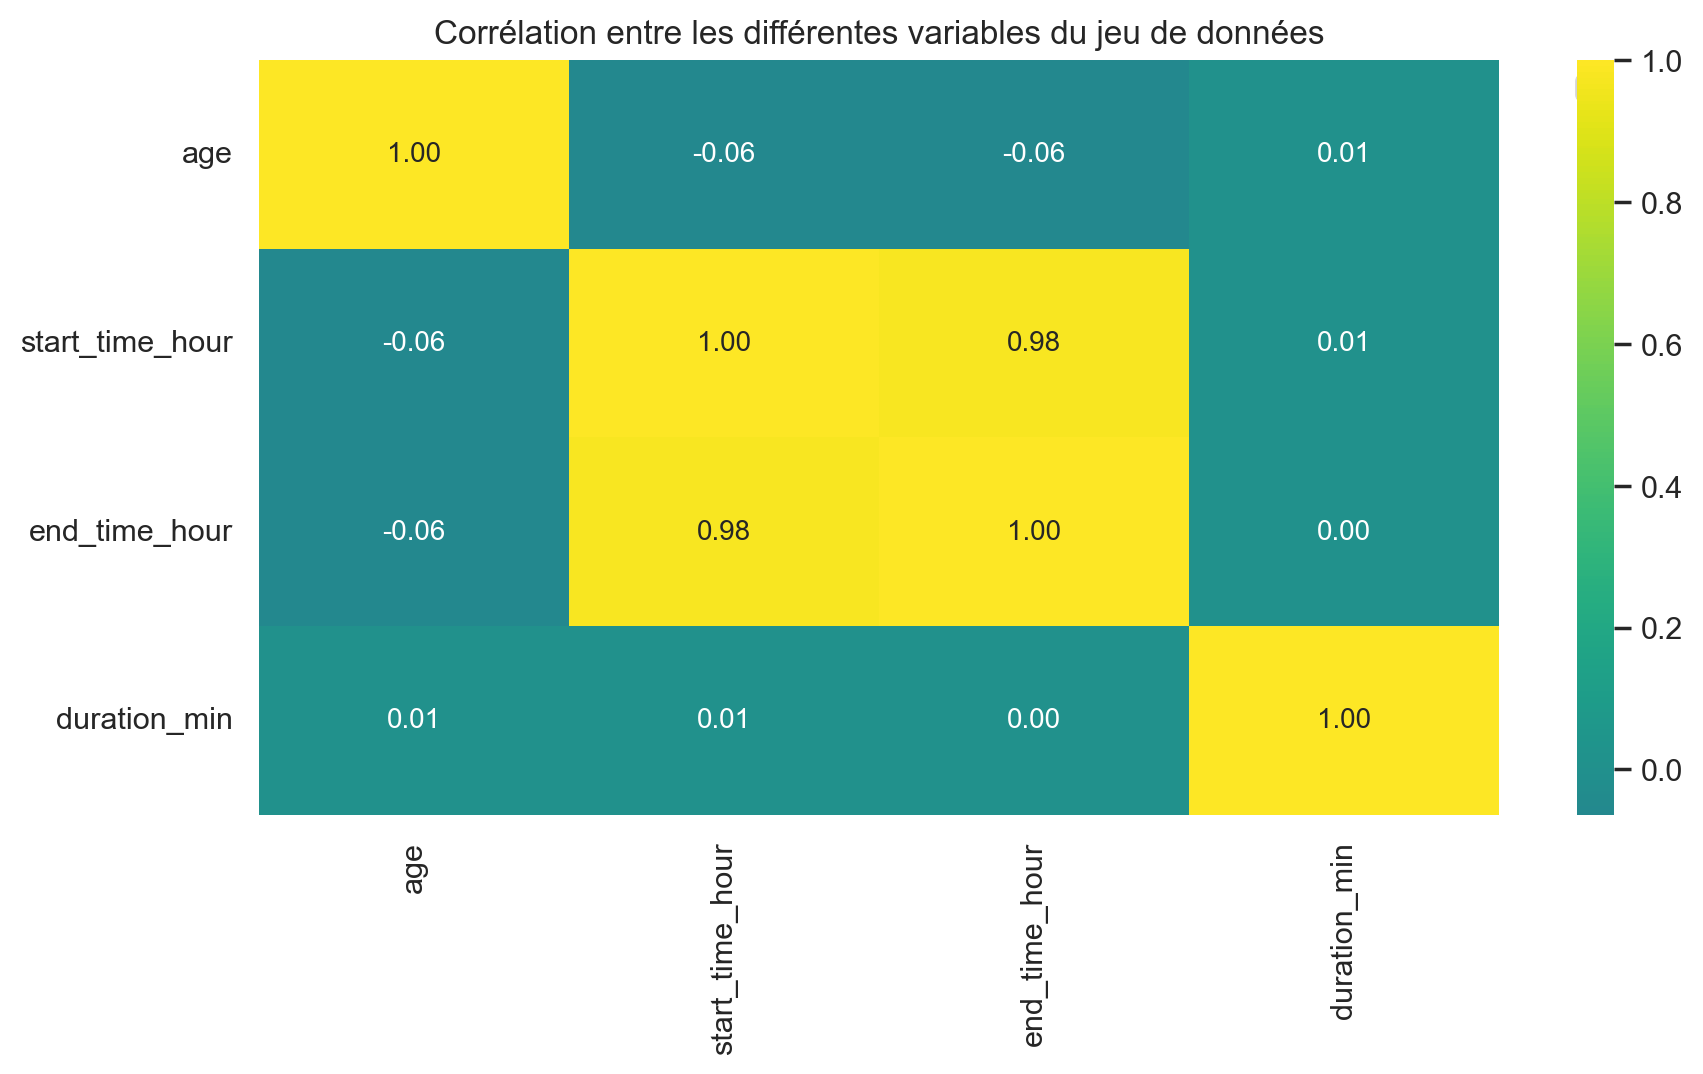

In [184]:
# Matrice de corrélation entre les variables du jeu de données

plt.figure(figsize = (10,5), dpi = 200)

sns.heatmap(data.corr(), annot = True, fmt = '.2f', cmap = 'viridis', center = 0)
plt.title("Corrélation entre les différentes variables du jeu de données")
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show();

Les graphiques ci-dessus montrent comment Corrélation entre chaque variable dans l'ensemble de données à l'aide de tracés de carte thermique :
- Il y a une corrélation négative entre l'âge et l'heure de début de trajet à vélo.
- Il y a une corrélation négative entre l'âge et l'heure de fin de trajet à vélo.

### Quelle est la relation entre le sexe, le type d'utilisateur et la durée du trajet ?

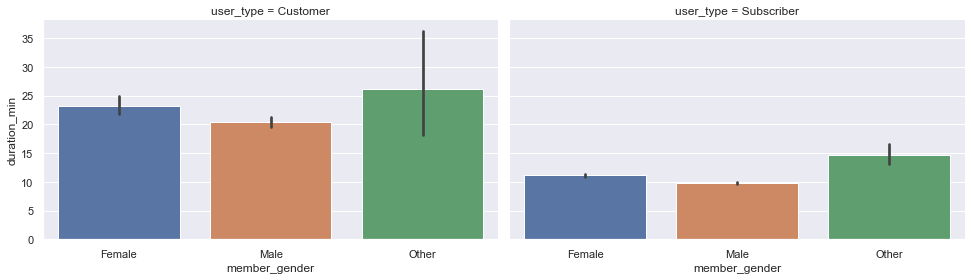

In [185]:
# Relation entre le sexe, le type d'utilisateur et la durée du trajet
sns.catplot(x = "member_gender", y = "duration_min", col = "user_type", data = data, kind = "bar", height = 4, aspect = 1.7);

- Les clients ont une durée moyenne de voyage plus élevée que les abonnés.

### Quelle est la variation moyenne de la durée du trajet en semaine entre les clients et les abonnés ?

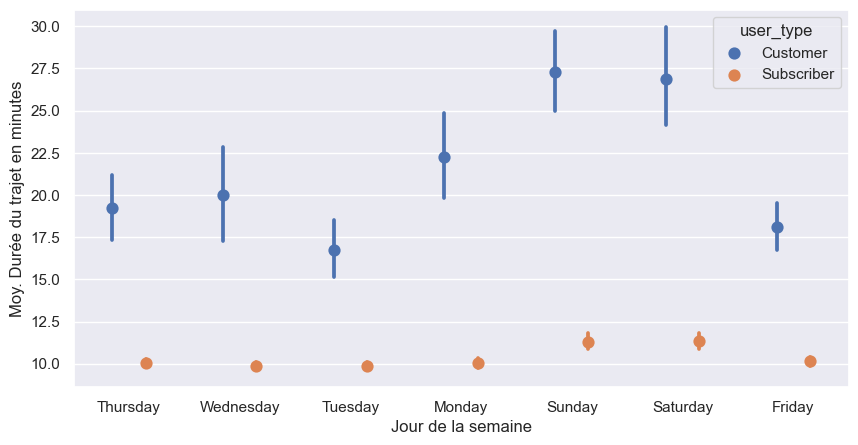

In [165]:
# Variation moyenne de la durée du trajet en semaine entre les clients et les abonnés
plt.figure(figsize = (10, 5), dpi = 100)
sns.pointplot(data=data, x='start_time_weekday', y='duration_min', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Jour de la semaine');
plt.ylabel('Moy. Durée du trajet en minutes');

- Il ressort du graphique ci-dessus que les abonnés effectuent des trajets beaucoup plus courts/rapides que les clients chaque jour de la semaine.

<a id='conclusion'></a>
# Conclusion

- La plupart des utilisateurs étaient des hommes.
- La plupart des utilisateurs étaient abonnés.
- La distribution de la durée était étrange car les graphiques des minutes et des heures étaient de 30 minutes ou moins pour la plupart des utilisateurs.

<a id='limites'></a>
# Limites

- Présence de données manquantes pour certaines colonnes.
- Présence des valeurs aberrantes pour la colonne âge.